In [1]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
%matplotlib inline

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

pd.set_option("display.max_colwidth", 1000)

import warnings
warnings.filterwarnings("ignore")

In [12]:
raw = pd.read_csv(r'covid_19_clean_complete.csv', sep=',', encoding='cp1251', parse_dates=['Date'])
raw.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered
0,NaN,Afghanistan,33.0000,65.0000,2020-01-22,0,0,0
1,NaN,Albania,41.1533,20.1683,2020-01-22,0,0,0
2,NaN,Algeria,28.0339,1.6596,2020-01-22,0,0,0
3,NaN,Andorra,42.5063,1.5218,2020-01-22,0,0,0
4,NaN,Angola,-11.2027,17.8739,2020-01-22,0,0,0


In [13]:
rus = raw[raw['Country/Region']=='Russia']
rus['time'] = rus.apply(lambda x: True if x.loc['Confirmed'] > 0 else False , axis=1).cumsum()
rus['new_case'] = rus.loc[:,'Confirmed'].diff()
rus.drop(columns=['Province/State', 'Lat', 'Long'], inplace=True)
rus = rus.reset_index()
rus.head()

,index,Country/Region,Date,Confirmed,Deaths,Recovered,time,new_case
0,187,Russia,2020-01-22,0,0,0,0,NaN
1,449,Russia,2020-01-23,0,0,0,0,0.0
2,711,Russia,2020-01-24,0,0,0,0,0.0
3,973,Russia,2020-01-25,0,0,0,0,0.0
4,1235,Russia,2020-01-26,0,0,0,0,0.0


In [4]:
rus.drop(columns=['index'], inplace=True)

In [5]:
rus= rus[rus['Confirmed']>0].reset_index(drop=True)
rus['active'] = rus['Confirmed'] - rus['Recovered']

In [6]:
rus

,Country/Region,Date,Confirmed,Deaths,Recovered,time,new_case,active
0,Russia,2020-01-31,2,0,0,1,2.0,2
1,Russia,2020-02-01,2,0,0,2,0.0,2
2,Russia,2020-02-02,2,0,0,3,0.0,2
3,Russia,2020-02-03,2,0,0,4,0.0,2
4,Russia,2020-02-04,2,0,0,5,0.0,2
...,...,...,...,...,...,...,...,...
77,Russia,2020-04-17,32008,273,2590,78,4070.0,29418
78,Russia,2020-04-18,36793,313,3057,79,4785.0,33736
79,Russia,2020-04-19,42853,361,3291,80,6060.0,39562
80,Russia,2020-04-20,47121,405,3446,81,4268.0,43675


In [ ]:
t[i] = ежедневные отметки времени
x[i] = число активных случаев болезни в этот день
u[i] = ln(x[i])
w[i] = ln(t[i])

Возьмем функцию y(t) = b/t · e -c(ln(t)-a)2
u(w) = ln(y) = ln(b)- w - cw2 + 2c·a·w - c·a2
Сделаем замены: А=-с B=2·a·c - 1 C=ln(b)-c·a2
u(w) = A·w2+B·w+C

In [66]:
t = rus['active']
x = rus['time']
u = np.log(x)
w = np.log(t)

In [62]:
def y(t):
    return b/t * np.exp(-c(np.log(t)-a)**2)

In [76]:
def u(w):
    return np.log(b) - w - c*w**2 + 2* c*a*w - c*a**2

In [ ]:
def fun(x, t):
  
    A = -c
    B = 2*a*c
    C = np.log(b)-c*a**2
    
    y = A**2 + B + C
    return y

In [77]:
ABC = [u(50),u(60),u(80)]
ans = [u.sum()*w.sum()**2, u.sum()*w.sum(), u.sum()]

M = [[ABC[0]*w.sum()**4 , ABC[1]*w.sum()**3 , ABC[2]*w.sum()**2],
     [ABC[0]*w.sum()**3 , ABC[1]*w.sum()**2 , ABC[2]*w.sum()],
     [ABC[0]*w.sum()**2 , ABC[1]*w.sum() , C*t]]

NameError: name 'b' is not defined

In [74]:
np.linalg.solve(M, ans)

TypeError: No loop matching the specified signature and casting was found for ufunc solve1

In [14]:
raw.Date = pd.to_datetime(raw.Date).apply(lambda x: x.strftime('%Y-%M-%D'))
print(raw.shape)
raw.head()

(23842, 8)


,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered
0,NaN,Afghanistan,33.0000,65.0000,2020-00-01/22/20,0,0,0
1,NaN,Albania,41.1533,20.1683,2020-00-01/22/20,0,0,0
2,NaN,Algeria,28.0339,1.6596,2020-00-01/22/20,0,0,0
3,NaN,Andorra,42.5063,1.5218,2020-00-01/22/20,0,0,0
4,NaN,Angola,-11.2027,17.8739,2020-00-01/22/20,0,0,0


In [10]:
# raw[raw['Country/Region']=='US']
# raw.groupby(['ObservationDate', 'Country/Region'])['Confirmed'].sum().reset_index()
# raw.groupby(['ObservationDate', 'Country/Region'])['Confirmed'].sum().reset_index()
# gropped_country[gropped_country['Country/Region']=='Hong Kong'].Confirmed.pct_change().replace(np.inf, 0).mean()

In [16]:
gropped_country = raw.groupby(['Date', 'Country/Region'])['Confirmed'].sum().reset_index()
row = []
for contry in raw['Country/Region'].unique():
    raw.groupby(['Date', 'Country/Region'])['Confirmed'].sum().reset_index()
    row += [[contry, gropped_country[gropped_country['Country/Region']==contry].Confirmed.pct_change().replace(np.inf, 0).mean()]]
    
    
pd.DataFrame(row, columns=['Country', 'pct_change'])

,Country,pct_change
0,Afghanistan,0.164863
1,Albania,0.196130
2,Algeria,0.177741
3,Andorra,0.445005
4,Angola,0.117041
...,...,...
180,Malawi,0.103855
181,South Sudan,0.107843
182,Western Sahara,0.029412
183,Sao Tome and Principe,0.000000


In [4]:
raw[raw['Country/Region']=='Russia'].tail()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
9555,9556,2020-03-28,NaN,Russia,2020-03-28 23:11:06,1264.0,4.0,49.0
9866,9867,2020-03-29,NaN,Russia,2020-03-29 23:14:06,1534.0,8.0,64.0
10178,10179,2020-03-30,NaN,Russia,2020-03-30 22:58:55,1836.0,9.0,66.0
10491,10492,2020-03-31,NaN,Russia,2020-03-31 23:49:27,2337.0,17.0,121.0
10804,10805,2020-04-01,NaN,Russia,2020-04-01 22:04:58,2777.0,24.0,190.0


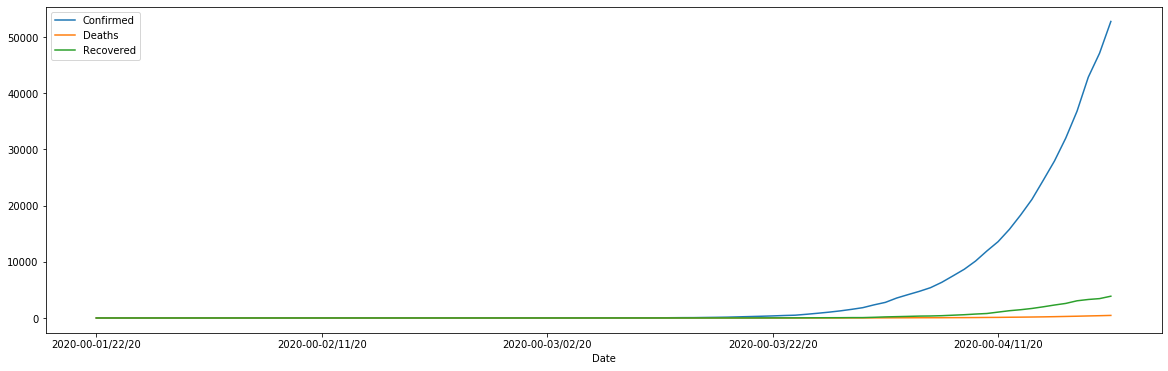

In [17]:
raw[raw['Country/Region']=='Russia'].set_index('Date')[['Confirmed', 'Deaths','Recovered']].plot(figsize=(20,6))

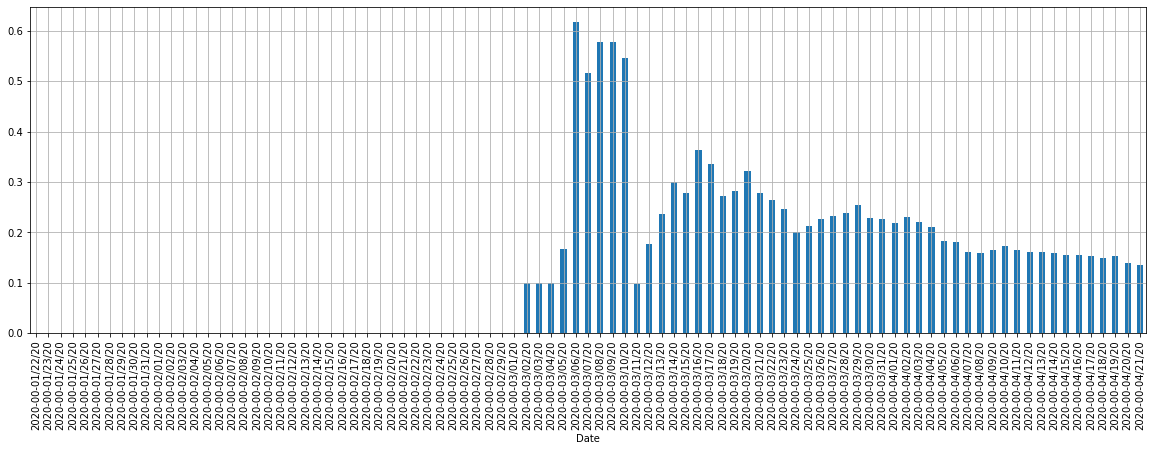

In [19]:
# raw[raw['Country/Region']=='Russia'].set_index('ObservationDate').Confirmed.pct_change().plot(figsize=(20,6))
raw[raw['Country/Region']=='Russia'].set_index('Date').Confirmed.pct_change().rolling(5).mean().plot.bar(figsize=(20,6))
plt.grid();

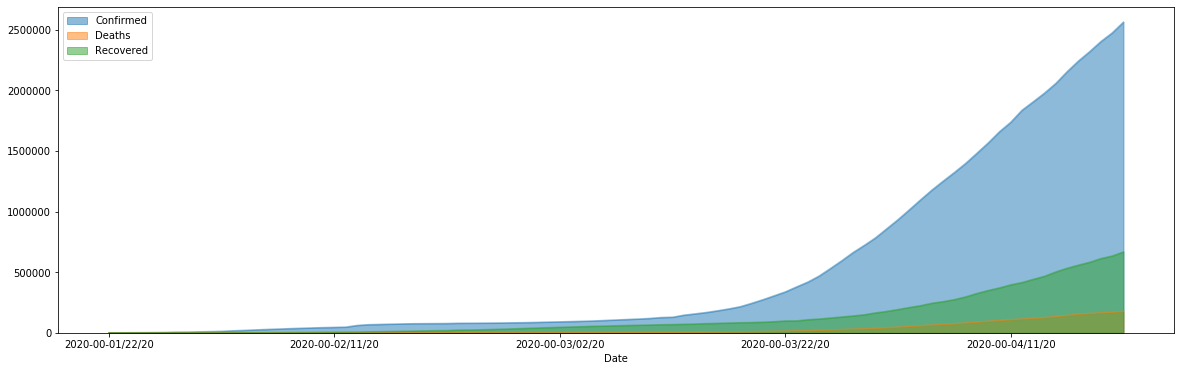

In [20]:
raw.groupby(['Date'])[['Confirmed', 'Deaths','Recovered']].sum().plot.area(figsize=(20,6), stacked=False)

In [21]:
# C:\Users\aseld\Downloads/

population_raw = pd.read_csv(r'C:\Users\aseld\Downloads/locations_population.csv')
print(population_raw.shape)
population_raw.head()

(322, 4)


,Province.State,Country.Region,Population,Provenance
0,NaN,Afghanistan,35530000,NaN
1,NaN,Albania,2877000,NaN
2,NaN,Algeria,41320000,NaN
3,NaN,Andorra,78000,NaN
4,NaN,Antigua and Barbuda,102012,NaN


In [22]:
population_raw.groupby('Country.Region')['Population'].sum()

Country.Region
Afghanistan    35530000
Albania         2877000
Algeria        41320000
Andorra           78000
Angola         29780000
                 ...   
Uzbekistan     32390000
Venezuela      31980000
Vietnam        95540000
Zambia         17090000
Zimbabwe       16530000
Name: Population, Length: 190, dtype: int64

In [23]:
confirmed = pd.read_csv(r'C:\Users\aseld\Downloads/confirmed_global.csv')
print(confirmed.shape)
confirmed.head()

(258, 77)


,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,84,94,110,110,120,170,174,237,273,281
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,146,174,186,197,212,223,243,259,277,304
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,302,367,409,454,511,584,716,847,986,1171
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,188,224,267,308,334,370,376,390,428,439
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,3,4,4,5,7,7,7,8,8,8
